```{admonition} Information
__Section__: Predict the mean speed from the type of vessel
__Goal__: Understand how dealing with missing values impact the model, the predictions and the performance.
__Time needed__: x min
__Prerequisites__: AIS data, basics about machine learning
```

# Predict the mean speed from the type of vessel

Your customer now would like to be able to predict the mean SOG of a ship, knowing the type of ship. This can be useful to predict when a particular ship would arrive at a lock, for example. The static dataset is again used in this case.

## Do the prediction

In [2]:
%run 1-functions.ipynb # this line runs the other functions we will use later on the page

import pandas as pd

static_data = pd.read_csv('./static_data.csv')

Solve these two widgets to determine the values of the ``x`` and ``y`` variables and the appropriate function to use (if the problem is regression or classification). ``x`` contains the variables used for prediction, and ``y`` contains the variable we want to predict.

In [1]:
from IPython.display import IFrame
IFrame("https://h5p.org/h5p/embed/753577", "694", "600")

In [4]:
from IPython.display import IFrame
IFrame("https://h5p.org/h5p/embed/753637", "694", "300")

```{toggle} Advanced level
Start with filling the ``x`` and ``y`` variables with the appropriate attributes (the attributes must be passed as strings, on this form: ``'attribute'``).
```

In [2]:
# Prediction of MeanSOG from VesselType
x = ['']
y = ['']

```{toggle} Advanced level
Make the predictions with the right prediction function (uncomment the lines by removing the ``#`` and replace the ``xxx`` with the appropriate name: ``classification`` or ``regression``).

Again, we want to compare the results of a prediction with and without missing values. We do the prediction twice, again using the method [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to remove the missing values.
```

In [6]:
from sklearn.metrics import mean_absolute_error

#static_selected = static_data[[x[0], y[0]]].dropna()

#pred1, ytest1 = knn_xxx(static_data, x, y)
#pred2, ytest2 = knn_xxx(static_selected, x, y)

#print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
#print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

MAE with all data: 0.9494952790387338
MAE without NaN: 1.3669249458570074


In [7]:
# For beginner version: hide cell

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

functions = ['not chosen', 'classification', 'regression']
attributes = static_data.columns

def make_prediction(x, y, function):
    static_selected = static_data[[x, y]].dropna()
    
    if function == 'regression' and static_data[y].dtype.name in ['object', 'int64', 'float64']:
        pred1, ytest1 = knn_regression(static_data, [x], [y])
        pred2, ytest2 = knn_regression(static_selected, [x], [y])
        
        print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
        print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))
    
    elif function == 'classification' and static_data[y].dtype.name == ['category']:
        pred1, ytest1 = knn_classification(static_data, [x], [y])
        pred2, ytest2 = knn_classification(static_selected, [x], [y])
        
        print('Accuracy with all data: ' + str(accuracy_score(pred1, ytest1)))
        print('Accuracy without NaN: ' + str(accuracy_score(pred2, ytest2)))
        
    elif function == 'not chosen':
        print('Choose a type of task.')
        
    else:
        print('The type of task does not match the type of the attribute to predict.')

interact(make_prediction,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
         function = widgets.Dropdown(
            options = functions,
            value = functions[0],
            description = 'Type: ',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.make_prediction(x, y, function)>

This time, on the contrary to the previous exercise, we see that the performance decreases when we drop the missing data. To understand why, let's do a similar analysis on these attributes and the predictions.

## Analyze the results

Just like for the prediction of the width, the function used cannot deal with missing values. The missing values where therefore replaced with zero values again.

First, let's see how many missing values we have for the two considered attributes:

In [8]:
#print('Number of instances in the dataset: ' + str(len(static_data)))
#print('Number of missing values for x attribute: ' + str(static_data[x[0]].isnull().sum()))
#print('Number of missing values for y attribute: ' + str(static_data[y[0]].isnull().sum()))

Number of instances in the dataset: 1520
Number of missing values for x attribute: 233
Number of missing values for y attribute: 0


In [9]:
# For beginner version: hide cell

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

attributes = static_data.columns

def print_missing(x, y):
    
    print('Number of instances in the dataset: ' + str(len(static_data)))
    print('Number of missing values for x attribute: ' + str(static_data[x].isnull().sum()))
    print('Number of missing values for y attribute: ' + str(static_data[y].isnull().sum()))

interact(print_missing,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.print_missing(x, y)>

Text(0.5, 1.0, 'y attribute vs. x attribute with NaN filled with zeros')

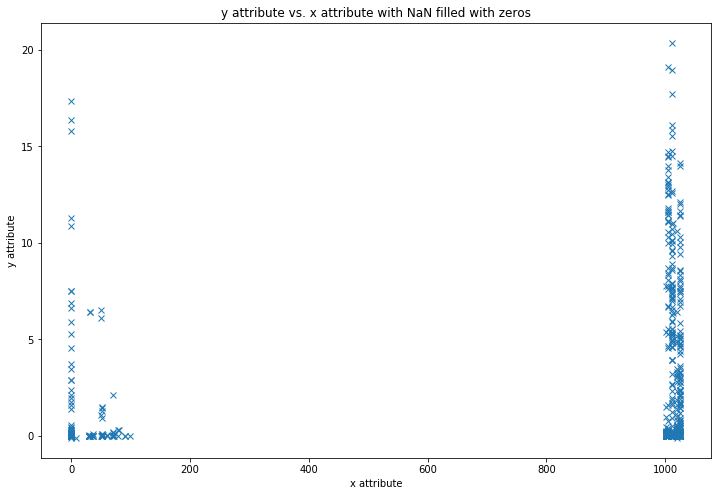

In [10]:
# Missing values filled with zeros

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
#plt.plot(static_data.fillna(value = 0)[x[0]], static_data.fillna(value = 0)[y[0]], 'x')
plt.xlabel('x attribute')
plt.ylabel('y attribute')
plt.title('y attribute vs. x attribute with NaN filled with zeros')

Text(0.5, 1.0, 'y attribute vs. x attribute with NaN dropped')

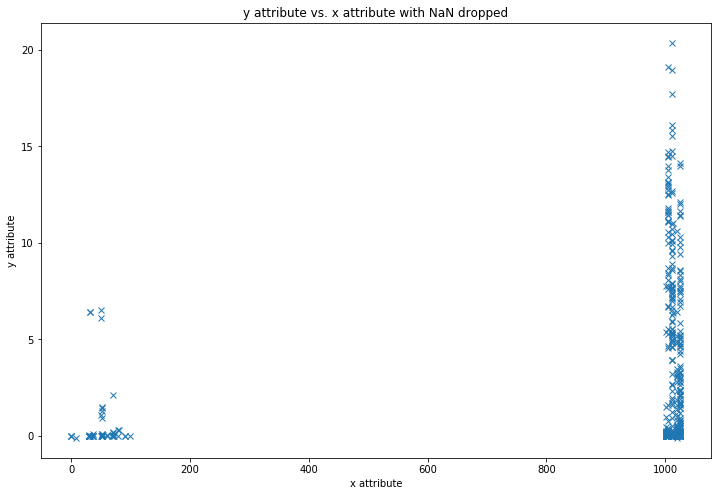

In [11]:
# Missing values dropped

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
#static_selected = static_data[[x[0], y[0]]].dropna()
#plt.plot(static_selected[x[0]], static_selected[y[0]], 'x')
plt.xlabel('x attribute')
plt.ylabel('y attribute')
plt.title('y attribute vs. x attribute with NaN dropped')

```{toggle} Advanced level
It is kind of hard to draw a conclusion from these two graphs. Let's have a look at the predictions made. The diagonal of perfect prediction is again drawn in black.
```

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Prediction vs. true label with NaN filled with zero values')

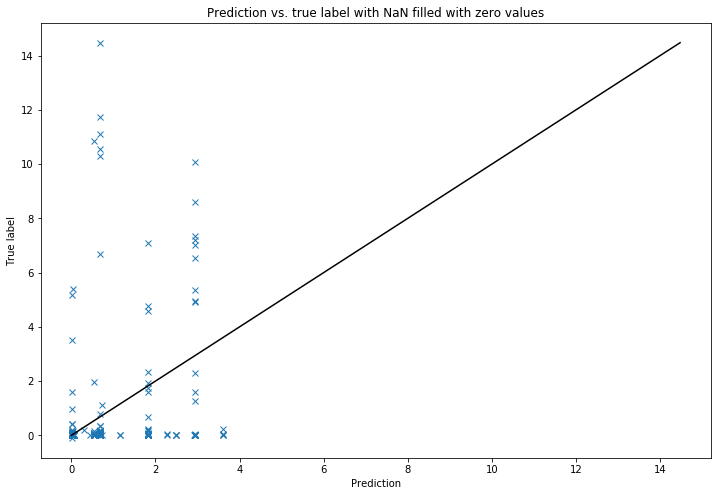

In [16]:
import matplotlib.pyplot as plt

# Missing values filled with zeros
pred = []
#for element in pred1:
#    pred.append(element[0])

plt.figure(figsize = (12, 8))
#plt.plot(pred, ytest1, 'x')

#x = np.linspace(0, float(ytest1.max()), float(ytest1.max()))
#plt.plot(x, x, color = 'black')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN filled with zero values')

C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Prediction vs. true label with NaN dropped')

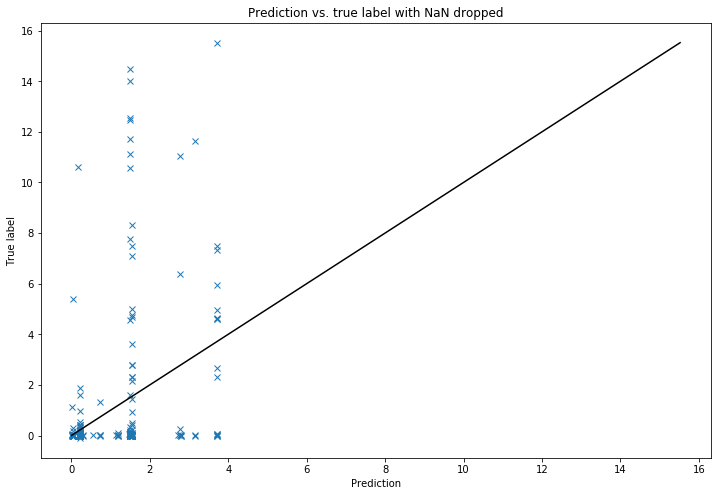

In [17]:
# Missing values dropped
pred = []
#for element in pred2:
#    pred.append(element[0])

plt.figure(figsize = (12, 8))
#plt.plot(pred, ytest2, 'x')

#x = np.linspace(0, float(ytest2.max()), float(ytest2.max()))
#plt.plot(x, x, color = 'black')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN dropped')

In [15]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
attributes = static_data.columns

def plot_2att(x, y, mode):
    
    static_selected = static_data[[x, y]].dropna()
    pred1, ytest1 = knn_regression(static_data, [x], [y])
    pred2, ytest2 = knn_regression(static_selected, [x], [y])
    
    plt.figure(figsize = (12, 8))
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
        plt.plot(pred, ytest1, 'x')
        
        x = np.linspace(0, float(ytest1.max()), float(ytest1.max()))
        plt.plot(x, x, color = 'black')
        
        title = 'Prediction vs. true label with NaN filled with zero values'
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])
        plt.plot(pred, ytest2, 'x')
        
        x = np.linspace(0, float(ytest2.max()), float(ytest2.max()))
        plt.plot(x, x, color = 'black')
        
        title = 'Prediction vs. true label with NaN dropped'
        
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_2att,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
        mode = widgets.Dropdown(
            options = modes,
            value = modes[0],
            description = 'Mode:',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.plot_2att(x, y, mode)>

From these graphs, we can only see that the predictions are not really good (there are not many points on the diagonal, a perfect diagonal means a perfect match between predictions and true labels). But we cannot really see a difference between the two prediction models. To try to see a bit more, let's look at the distribution of the predictions:

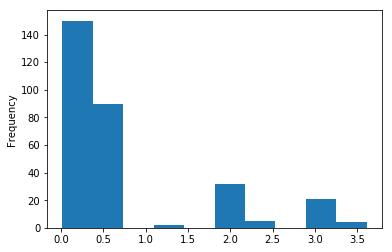

In [16]:
# Missing values filled with 0
pred = []
#for element in pred1:
#    pred.append(element[0])
#pd.Series(pred).plot.hist()

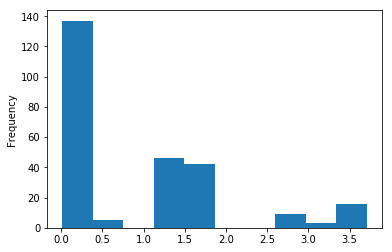

In [17]:
# Missing values dropped
pred = []
#for element in pred2:
#    pred.append(element[0])
#pd.Series(pred).plot.hist()

In [18]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']
attributes = static_data.columns

def plot_hist(x, y, mode):
    
    static_selected = static_data[[x, y]].dropna()
    pred1, ytest1 = knn_regression(static_data, [x], [y])
    pred2, ytest2 = knn_regression(static_selected, [x], [y])
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])

    pd.Series(pred).plot.hist()

interact(plot_hist,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
        mode = widgets.Dropdown(
            options = modes,
            value = modes[0],
            description = 'Mode:',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.plot_hist(x, y, mode)>

From these two histograms, something gets more clear: when the missing values are filled with zeros, the prediction gives much more low values (close to 0) predictions for the MeanSOG than when the missing values are dropped.

The attribute MeanSOG does not contain any missing values, so the only values that are replaced with 0 are the missing values for VesselType. However, we saw when we examined the dataset in the [previous part](./1-1-2-examine.html), that the attribute MeanSOG contains a lot of low values (under 1). We can conclude that there is more chance for the model to predict a low value for the MeanSOG. And, as low values constitute the majority of the MeanSOG attribute, the chance of a zero prediction being close to the true label is high (so the performance gets better when the model predicts a low value of MeanSOG). That is the reason why the error increases when we delete these values.

A low MeanSOG value is considered "normal" in the dataset, so a dataset that encourages a low prediction will give a better performance.

## What is the best scenario?

We saw that dropping the missing values gives a worse performance because the model predicts less low values for the attribute MeanSOG. Keeping the missing values and replacing them with zero gives a better performance.

Now, is this what we want for our model?

This question is a bit tricky to solve. Instinctively, we would like a model that gives the better performance on the testing set. But the choice of replacing the missing values with zero values was a standard choice based on no solid thought, and this is not the best way to deal with decisions in problem-solving.

The fact that the model gave better performance is not related to the way of solving the task, and some further thoughts are always better to ensure that the model is built on a stable basis.

## Quiz

In [5]:
from IPython.display import IFrame
IFrame("https://h5p.org/h5p/embed/755347", "694", "600")